Program for showing the missing mass of a sample NH3 run

In [1]:
import ROOT
import numpy as np
c = ROOT.TCanvas("c","c",1100,800)

Welcome to JupyROOT 6.22/06


In [45]:
#file = "/volatile/clas12/users/gmat/clas12analysis.sidis.data/rgc-su-train/aug18/aug18_14.root"
file = "../../dihadron_process/rgc-test.root"
f = ROOT.TFile(file,"READ")
t = f.Get("tree_reco")

In [47]:
mE = 0.000511
mP = 0.938272
Ei = 10.5473
Pzi = np.sqrt(Ei**2-mE**2)

init_electron = ROOT.TLorentzVector(0,0,Pzi,Ei)
init_proton = ROOT.TLorentzVector(0,0,0,mP)
h = ROOT.TH1F("h","; Missing Mass [GeV] ; Counts ",100,0,20)

i = 0
for iev in t:
    Pxf = iev.px.at(0)
    Pyf = iev.py.at(0)
    Pzf = iev.pz.at(0)
    Ef = iev.E.at(0)
    final_electron = ROOT.TLorentzVector()
    final_electron.SetPxPyPzE(Pxf,Pyf,Pzf,np.sqrt(Pxf**2+Pyf**2+Pzf**2+mE**2))
    h.Fill((init_electron+init_proton-final_electron).M())
    i=i+1
    if(i%20000==0):
        break

Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).


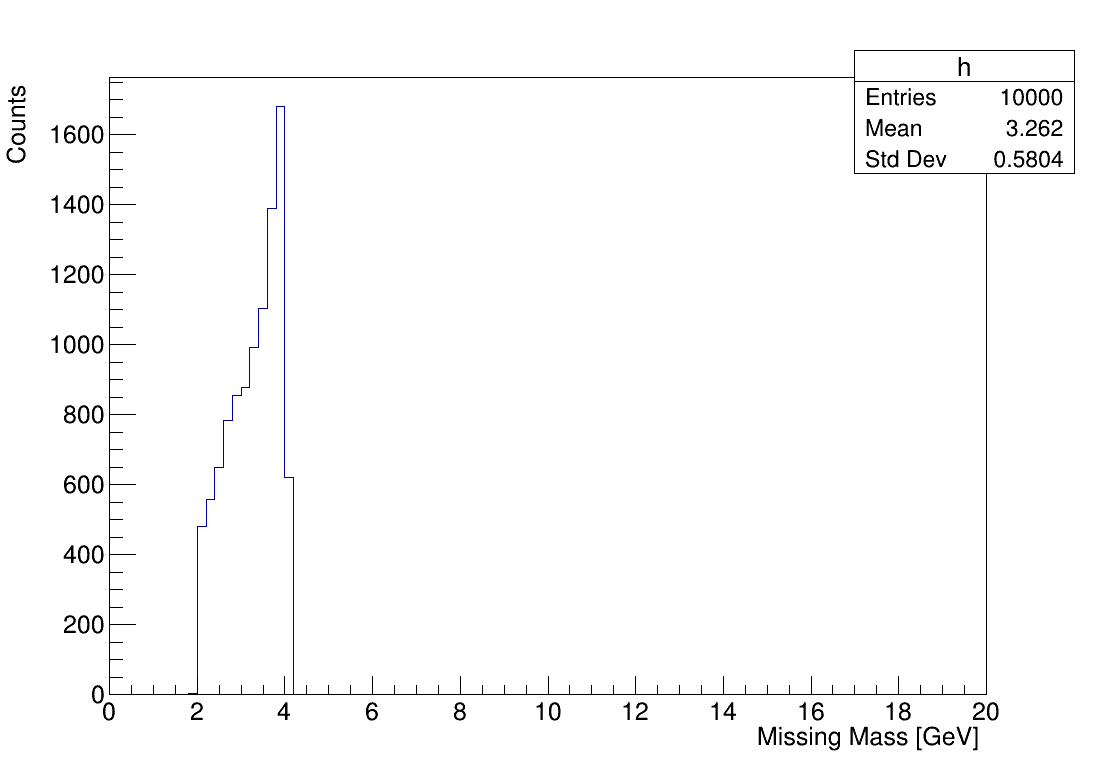

In [49]:
h.Draw()
c.Draw()

In [26]:
iev.status.at(0)

-2131.0

In [29]:
np.sqrt(Pxf**2+Pyf**2+Pzf**2+mE**2)

5.424090510694871

In [30]:
Ef

5.424090385437012